In [19]:
import healpy as hp, numpy as np, prjlib, curvedsky, pickle, plottools as pl, warnings, tqdm
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [2]:
pobj = { t : prjlib.analysis_init(t=t,freq='145',ntype='base_roll50') for t in ['la','sa'] }

In [3]:
# Load apodized mask and survey boundary
W = { t : prjlib.window(pobj[t].telescope,ascale=pobj[t].ascale)[0] for t in ['la','sa'] }
M = { t : prjlib.window(pobj[t].telescope,ascale=0.)[0] for t in ['la','sa'] }

The loaded SAT mask is further multiplied by hit-count "binary" (not hit count itself)
The loaded SAT mask is further multiplied by hit-count "binary" (not hit count itself)


In [20]:
nQmap = {}
simn  = 10
for t in ['la','sa']:
    nQmap[t] = 0.
    for r in tqdm.tqdm(range(1,1+simn)):
        nQmap[t] += (hp.fitsfunc.read_map(pobj[t].fcmb.nois[r],field=1,verbose=False)/prjlib.Tcmb)**2
    nQmap[t] /= simn

100%|██████████| 10/10 [00:01<00:00,  6.86it/s]


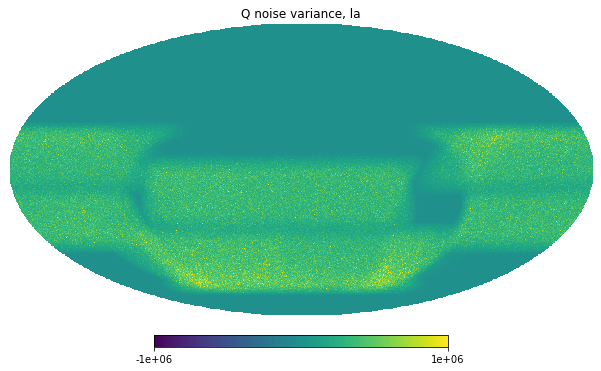

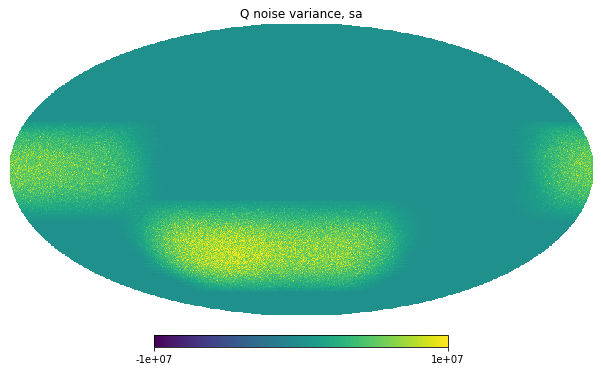

In [25]:
for t, v in [('la',1e6),('sa',1e7)]:
    hp.mollview(1./nQmap[t]**0.5,min=-v,max=v,title='Q noise variance, '+t)